In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import seaborn as sns
import datetime
import locale
print("Setup Complete")

Setup Complete


In [4]:
covid_filepath = 'Agreguoti_COVID19_atvejai_ir_mirtys.csv'
covid_data = pd.read_csv(covid_filepath, parse_dates = True)

In [5]:
covid_data.head(10)

,object_id,municipality_name,date,sex,age_gr,new_cases,deaths_all,deaths_cov1,deaths_cov2,deaths_cov3
0,1,Vilniaus m. sav.,2022-04-21,Moteris,0-9,7,0,0,0,0
1,2,Vilniaus m. sav.,2022-04-21,Moteris,10-19,11,0,0,0,0
2,3,Vilniaus m. sav.,2022-04-21,Moteris,20-29,35,0,0,0,0
3,4,Vilniaus m. sav.,2022-04-21,Moteris,30-39,36,0,0,0,0
4,5,Vilniaus m. sav.,2022-04-21,Moteris,40-49,24,0,0,0,0
5,6,Vilniaus m. sav.,2022-04-21,Moteris,50-59,25,0,0,0,0
6,7,Vilniaus m. sav.,2022-04-21,Moteris,60-69,28,1,0,0,0
7,8,Vilniaus m. sav.,2022-04-21,Moteris,70-79,16,0,0,0,0
8,9,Vilniaus m. sav.,2022-04-21,Moteris,80-89,3,7,0,1,1
9,10,Vilniaus m. sav.,2022-04-21,Moteris,90-99,3,1,0,0,0


In [6]:
# Tikrinam datos formata
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289169 entries, 0 to 289168
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   object_id          289169 non-null  int64 
 1   municipality_name  289169 non-null  object
 2   date               289169 non-null  object
 3   sex                289169 non-null  object
 4   age_gr             289169 non-null  object
 5   new_cases          289169 non-null  int64 
 6   deaths_all         289169 non-null  int64 
 7   deaths_cov1        289169 non-null  int64 
 8   deaths_cov2        289169 non-null  int64 
 9   deaths_cov3        289169 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 22.1+ MB


In [7]:
# Konvertuojam data i datetime formata ir nustatome kaip index'a
date_col = 'date'
covid_data[date_col] = pd.to_datetime(covid_data[date_col])
covid_data = covid_data.set_index(date_col)
covid_data = covid_data.sort_index()
locale.setlocale(locale.LC_TIME, 'lt_LT.UTF-8')

'lt_LT.UTF-8'

In [8]:
covid_data.head(10)

,object_id,municipality_name,sex,age_gr,new_cases,deaths_all,deaths_cov1,deaths_cov2,deaths_cov3
date,,,,,,,,,
2020-02-01,245667,Telšių r. sav.,Moteris,60-69,0,1,0,0,0
2020-02-01,143892,Kupiškio r. sav.,Vyras,50-59,0,1,0,0,0
2020-02-01,31754,Klaipėdos m. sav.,Moteris,80-89,0,3,0,0,0
2020-02-01,206277,Skuodo r. sav.,Moteris,80-89,0,1,0,0,0
2020-02-01,140820,Kretingos r. sav.,Vyras,70-79,0,1,0,0,0
2020-02-01,135568,Klaipėdos r. sav.,Vyras,80-89,0,1,0,0,0
2020-02-01,36974,Klaipėdos m. sav.,Vyras,70-79,0,1,0,0,0
2020-02-01,36975,Klaipėdos m. sav.,Vyras,80-89,0,1,0,0,0
2020-02-01,36976,Klaipėdos m. sav.,Vyras,90-99,0,1,0,0,0


In [9]:
# Tikrinam kokios yra amziaus grupes
covid_data['age_gr'].unique()

array(['60-69', '50-59', '80-89', '70-79', '90-99', '40-49', '0-9',
       'Centenarianai', '30-39', '20-29', '10-19', 'Nenustatyta'],
      dtype=object)

In [10]:
# Naikinam grupes 
covid_data = covid_data[covid_data.age_gr != 'Centenarianai']
covid_data = covid_data[covid_data.age_gr != 'Nenustatyta']

In [11]:
# Sujungiam grupes i viena grupe nuo 0 iki 29 metu ir apskaiciuojam grupes 14 d slenkanti vidurki
age29 = covid_data[(covid_data.age_gr == '0-9') | (covid_data.age_gr == '10-19') | (covid_data.age_gr == '20-29')]
age29['new_group'] = '0-29'
age29['rolling_mean_14'] = age29['new_cases'].rolling('14D').mean()

# Apskaiciuojam slenkanti 14 dienu vidurki kitoms amziaus grupems
age39 = covid_data[covid_data.age_gr == '30-39']
age39['new_group'] = '30-39'
age39['rolling_mean_14'] = age39['new_cases'].rolling('14D').mean()

age49 = covid_data[covid_data.age_gr == '40-49']
age49['new_group'] = '40-49'
age49['rolling_mean_14'] = age49['new_cases'].rolling('14D').mean()

age59 = covid_data[covid_data.age_gr == '50-59']
age59['new_group'] = '50-59'
age59['rolling_mean_14'] = age59['new_cases'].rolling('14D').mean()

age69 = covid_data[covid_data.age_gr == '60-69']
age69['new_group'] = '60-69'
age69['rolling_mean_14'] = age69['new_cases'].rolling('14D').mean()

age79 = covid_data[covid_data.age_gr == '70-79']
age79['new_group'] = '70-79'
age79['rolling_mean_14'] = age79['new_cases'].rolling('14D').mean()

age89 = covid_data[covid_data.age_gr == '80-89']
age89['new_group'] = '80-89'
age89['rolling_mean_14'] = age89['new_cases'].rolling('14D').mean()

age99 = covid_data[covid_data.age_gr == '90-99']
age99['new_group'] = '90-99'
age99['rolling_mean_14'] = age99['new_cases'].rolling('14D').mean()

C:\Users\CalmPanda\AppData\Local\Temp\ipykernel_5980\2237198883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age29['new_group'] = '0-29'
C:\Users\CalmPanda\AppData\Local\Temp\ipykernel_5980\2237198883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age29['rolling_mean_14'] = age29['new_cases'].rolling('14D').mean()
C:\Users\CalmPanda\AppData\Local\Temp\ipykernel_5980\2237198883.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

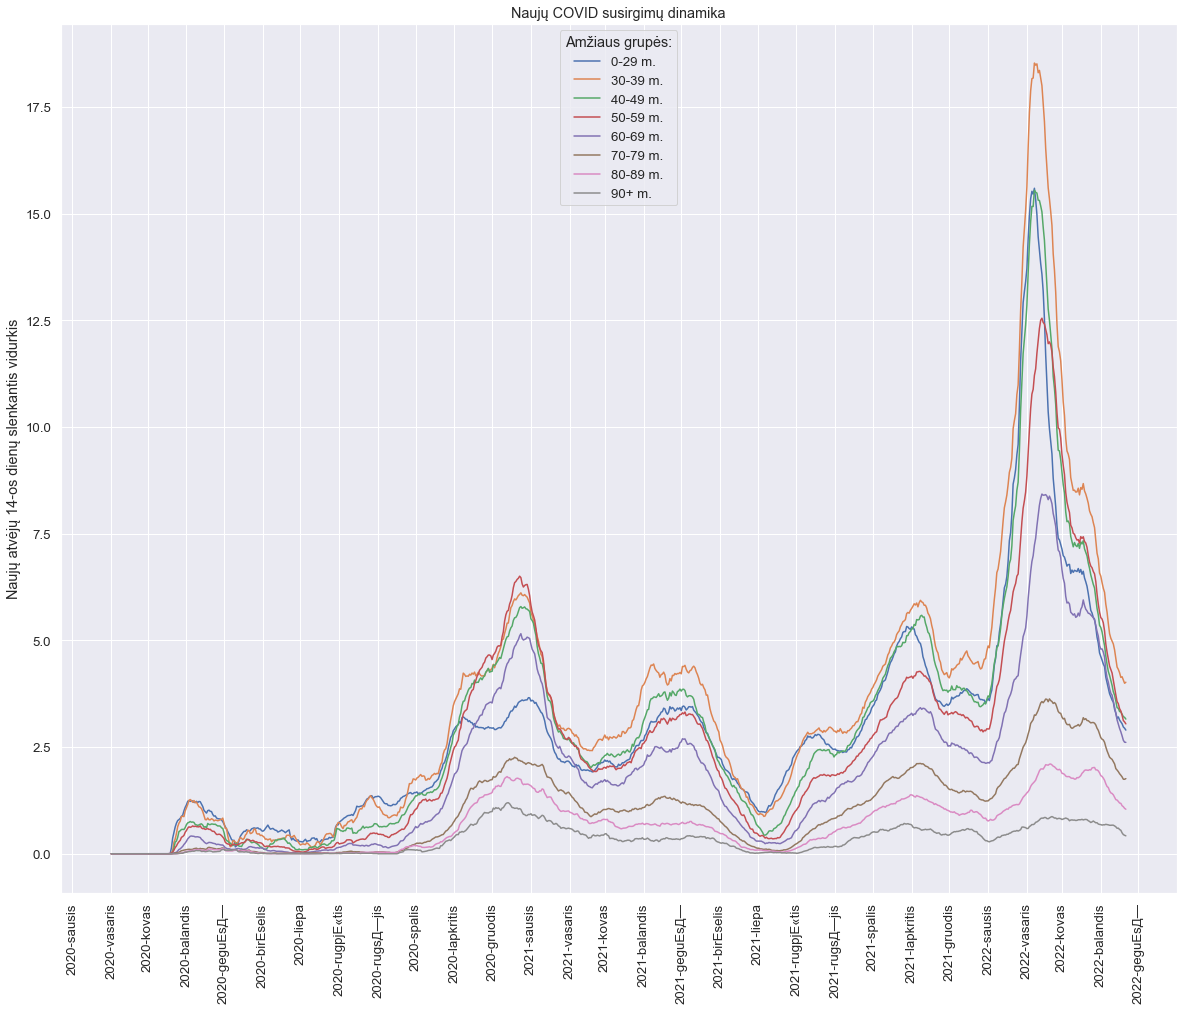

In [25]:
# Grafikas
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize = (20,16))
plt.title('Naujų COVID susirgimų dinamika')
# Duomenis pagal amziaus grupes
sns.lineplot(data = age29['rolling_mean_14'], ci = None, label = '0-29 m.')
sns.lineplot(data = age39['rolling_mean_14'], ci = None, label = '30-39 m.') 
sns.lineplot(data = age49['rolling_mean_14'], ci = None, label = '40-49 m.')
sns.lineplot(data = age59['rolling_mean_14'], ci = None, label = '50-59 m.')  
sns.lineplot(data = age69['rolling_mean_14'], ci = None, label = '60-69 m.')  
sns.lineplot(data = age79['rolling_mean_14'], ci = None, label = '70-79 m.')   
sns.lineplot(data = age89['rolling_mean_14'], ci = None, label = '80-89 m.')   
sns.lineplot(data = age99['rolling_mean_14'], ci = None, label = '90+ m.')  

# X asies pavadinimai lietuviu kalba
years = mdates.YearLocator()   
months = mdates.MonthLocator() 
years_fmt = mdates.DateFormatter('%Y-%B') 
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
plt.xticks(rotation = 'vertical')

# Legenda ir asiu pavadinimai
plt.legend(loc = 9, title = 'Amžiaus grupės:')
plt.ylabel('Naujų atvėjų 14-os dienų slenkantis vidurkis')
plt.xlabel('')

plt.show()